# Assignment 3  Bacteria Dynamics

## Learning Objectives
* Implement a stochastic simulation of bacteria population dynamics
* Use inferential statistics to estimate event probabilities
* Plot distribution of values in a set of data

#  Bacteria Dynamics


In this assignment, you will design and implement a stochastic simulation of bacteria population dynamics.  You will spend two weeks on this assignment.  By the end of the assignment, you will reach conclusions about how various random variables affect the spread of the bacteria based on the simulation results.

You should write code based on the provided skeleton in this document (code cells) for the solutions to address each problem in the assignment. 



# Background

## Bacteria
Bacteria are single-celled organisms that reproduce asexually. Some bacteria cause diseases, some are harmless, and some are beneficial. Bad bacteria can cause infections such as strep throat and tuberculosis. Bacterial infections are treated with antibiotics targeted to kill only the bad bacterial cells.
Bacteria that cause infections can resist and develop a resilience to antibiotics naturally and/or via use of antibiotics. Thus, populations of bacteria can undergo substantial evolutionary changes within a single patient over the course of treatment. In this assignment, we would like to focus on how populations of bacteria change within a single patient over time.  

## Computational Model
In the assignment problem set, we will implement a highly simplified stochastic model of bacteria population dynamics within a person. Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

The document below provides you with some skeleton code you can start with. Please do not change any of the provided skeleton code except to delete # TODO and replace **pass** that follows the comment.  


Here is the packages that I imported for all the coming codes later:

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
plt.style.use('seaborn-v0_8-whitegrid')

# Problem 1 Create SimpleBacteria class

The SimpleBacteria class maintains the state of a single bacteria. You will implement the following methods according to the docstring specifications:

```Python
 __init__
 reproduce 
 ```
 
The *is_killed* function actually is complete.  I provide it here for your reference to define the others. Please pay attention to the definition of the function, especially the use of **random.random()** for generating random numbers between 0 and 1. 


The skeleton code in the code cells provides you some hints for you to start with. 
 

**Hint**: During debugging, use random.seed(0) before your other random calls.  By this way, all "random" calls will be the same each time you run your file, and so your code will behave the same way each time you run it, which can be useful for debugging purposes.


In [3]:
##########################
# PROBLEM 1
##########################

class SimpleBacteria(object):
    """A simple bacteria cell with no antibiotic resistance"""

    def __init__(self, birth_prob, death_prob):
        self.birth_prob = birth_prob
        self.death_prob = death_prob

    def is_killed(self):
        # Do not change this method
        # return random.random() <= self.death_prob
        if  random.random() <= self.death_prob:
            return True
        else:
            return False

    def reproduce(self, pop_density):
        # Reproduction occurs with a probability related to birth_prob and population density, so...
        if random.random() <= self.birth_prob * (1 - pop_density):
            return SimpleBacteria(self.birth_prob, self.death_prob)
        else:
            return None

# Test code
random.seed(0)
birth_prob, death_prob = 0.1, 0.05
bacteria = []
for _ in range(100):
    bacteria.append(SimpleBacteria(birth_prob, death_prob))

# Example usage of is_killed and reproduce
test_bacteria = SimpleBacteria(birth_prob, death_prob)
print(test_bacteria.is_killed())  # Random test if the bacteria is killed
print(test_bacteria.reproduce(0.5))  # Random test of reproduction with population density 0.5


False
None


# Problem 2  Create Patient class

The Patient class maintains the state of a bacterial population associated with a patient. You will
implement the following methods according to the docstring specification:

```Python
__init__
get_total_pop 
update
```

For the update function definition, make sure you read the docstring specification and write your code following the steps in the specification. 

In [5]:
##########################
# PROBLEM 2
##########################

class Patient(object):
    """
    Representation of a simplified patient.
    """

    def __init__(self, bactorial, max_pop):
        """ The Arguments """
        self.bactorial = bactorial  # Store the list of bacteria (keeping original name 'bactorial')
        self.max_pop = max_pop      # Store the maximum population size

    def get_total_pop(self):
        return len(self.bactorial)  # Gets the size of current bacteria population while also returns the number of bacteria in the list

    def update(self):
        # Determine whether each bacteria cell dies, and keep the survivors
        surviving_bacteria = [b for b in self.bactorial if not b.is_killed()]

        # Then, calculate the population density
        pop_density = len(surviving_bacteria) / self.max_pop

        # Reproduce the bacteria that survive based on population density
        new_bacteria = []
        for bacterium in surviving_bacteria:
            offspring = bacterium.reproduce(pop_density)
            if offspring is not None:
                new_bacteria.append(offspring)

        # To update the bacteria list to include both surviving bacteria and new offspring
        self.bactorial = surviving_bacteria + new_bacteria

        # Return the total population size after update
        return self.get_total_pop()


# Test code
random.seed(0)
birth_prob, death_prob = 0.1, 0.05

bacteria = [SimpleBacteria(birth_prob, death_prob) for _ in range(100)]  # Create initial bacteria population
max_pop = 10000  # Maximum possible population
patient = Patient(bacteria, max_pop)

# Simulate 100 time steps and print total population
for step in range(100):
    patient.update()
print(patient.get_total_pop())  # Print the population at the end of the simulation


3087


In [7]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l = l1 + l2
print(l)

[1, 2, 3, 4, 5, 6]


# Problem 3 Running and Analyzing a Single Trial Simulation 

In this part you will understand the behavior of a group of bacteria cells as time passes through a simulation. You need to implement the function 
  * simulation_singletrial_bacteria
  
  according to the behavior described in the docstring in the below code cell.
  
  
At the end of your simulation_singletrial_bacteria, you need to produce a plot, which should display the bacteria population over time. 

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. So, please be patient. 


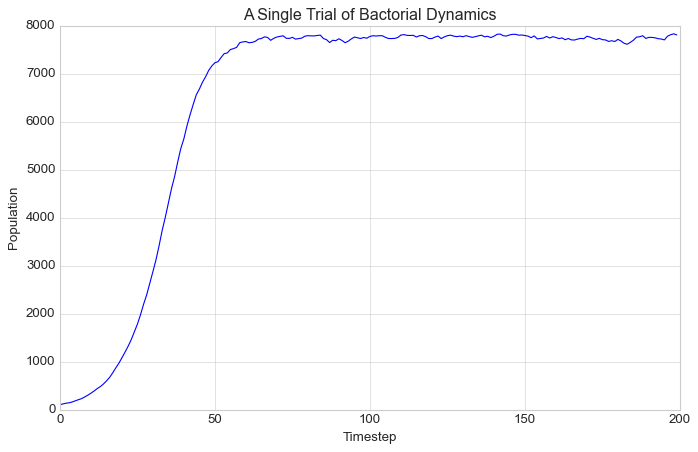

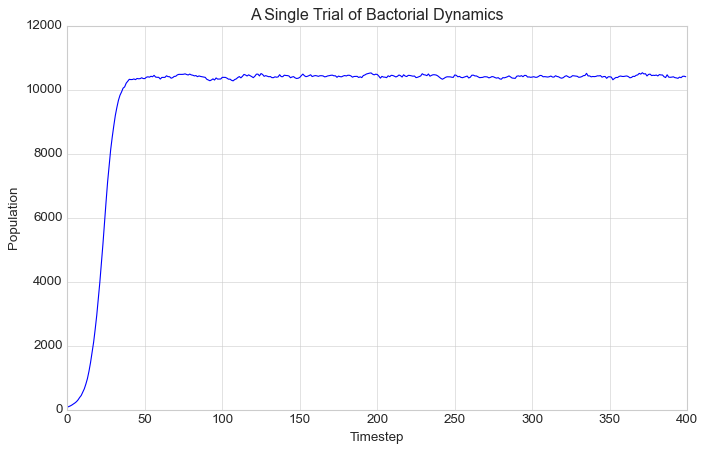

In [27]:
def simulation_singletrial_bacteria(num_bacteria,
                                    max_pop,
                                    birth_prob,
                                    death_prob,
                                    num_steps,
                                    to_plot=False):
    
    #Instantiate the list of SimpleBacteria
    bacteria = [SimpleBacteria(birth_prob, death_prob) for _ in range(num_bacteria)]
    
    #Instantiate the Patient with the list of SimpleBacteria and max population
    patient = Patient(bacteria, max_pop)
    
    #Simulate the population dynamics for num_steps
    population = []
    for _ in range(num_steps):
        population.append(patient.get_total_pop())  # Record the population at each time step
        patient.update()  # Update the bacteria population
    
    if to_plot:
        plt.figure(figsize=(10, 6))
        plt.plot(range(num_steps), population)
        plt.xlabel('Timestep')
        plt.ylabel('Population')
        plt.title('A Single Trial of Bactorial Dynamics')
        plt.grid(True)
        plt.show()
    
    return population

# Test the function with given parameters
random.seed(0)
population = simulation_singletrial_bacteria(100, 10000, 0.2, 0.05, 200, True)


#Here are some other arguments for the same parameters
random.seed(0)
population = simulation_singletrial_bacteria(75, 12000, 0.3, 0.05, 400, True)

<img src="p3.png" alt="Reference vis for the single trial simulation" />

# Problem 4 Running and Analyzing Multiple Trials 

In this part you will continually simulate and understand the behavior of a group of bacteria cells as time passes. To address this problem, you need to implement the functions 
  * calc_avg_popsize 
  * simulation_multitrials_bacteria
  
  according to the behavior described in the docstrings in the provided code.
  
While you must implement *calc_avg_popsize*, you are also **required** to use it while implementing *simulation_multitrials_bacteria*. (That is, you need to call *calc_avg_popsize* in your function definition of *simulation_multitrials_bacteria*. 
  
When calling *simulation_multitrials_bacteria*, if to_plot is True, the function implementation produces a plot of your results as well as the populations. The plot should display the average bacteria population over time. You plot the average population across num_trials, so that the resulting curve is smooth and shows a general trend rather than the particular details of any one trial. 

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. 

Hint: simulation_multitrials_bacteria asks you to return a 2D list of populations at each time step for each trial such that populations[i][j] would be the population for the trial i at time step j. This means that if we are running 2 trials for 5 time steps, populations may look something like:
[ [10, 34, 22, 40, 21], [15, 27, 32, 25, 41] ]


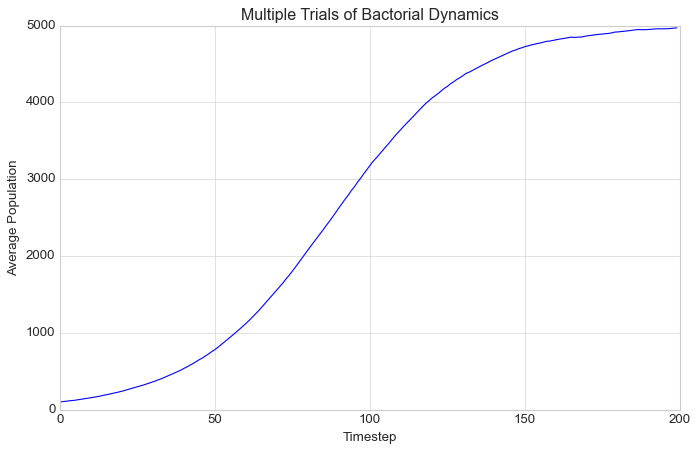

In [17]:
import matplotlib.pyplot as plt

def calc_avg_popsize(populations, n):
    total_pop = sum(trial[n] for trial in populations)
    return total_pop / len(populations)  # Calculate average


def simulation_multitrials_bacteria(num_bacteria,
                                    max_pop,
                                    birth_prob,
                                    death_prob,
                                    num_steps,
                                    num_trials,
                                    to_plot=False):
    populations = []
    
    # Run multiple trials
    for trial in range(num_trials):
        # To run a single trial
        trial_population = simulation_singletrial_bacteria(
            num_bacteria, max_pop, birth_prob, death_prob, num_steps, to_plot=False
        )
        populations.append(trial_population)

    # Again, if to_plot is True, plot the average population over time
    if to_plot:
        avg_population = [calc_avg_popsize(populations, t) for t in range(num_steps)]
        
        # Plot the average population over time
        plt.figure(figsize=(10, 6))
        plt.plot(range(num_steps), avg_population)
        plt.xlabel('Timestep')
        plt.ylabel('Average Population')
        plt.title('Multiple Trials of Bactorial Dynamics')
        plt.grid(True)
        plt.show()
    
    return populations

# Test the function with given parameters
random.seed(0)
populations = simulation_multitrials_bacteria(100, 10000, 0.1, 0.05, 200, 50, True)


<img src="p4.png" alt="Reference vis for the mutiple-trial simulation" />

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the cells with output presentation 

* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 3</b>
